In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\Mohammed Bhasith\\oil_production\\oil_well_data.csv")

In [3]:
df

,Date,Oil Volume (m3/day),Liquid Volume (m3/day),Gas Volume (m3/day),Water Volume (m3/day),Water Cut (%),Working Hours,Dynamic Level (m),Reservoir Pressure (atm)
0,2013-01-01,49,70,13055,21,29,24,1819,214
1,2013-01-02,49,70,13055,21,29,24,1836,214
2,2013-01-03,49,70,13055,21,29,24,1788,214
3,2013-01-04,49,70,13055,21,29,24,1789,214
4,2013-01-05,44,70,11768,26,36,24,1825,214
...,...,...,...,...,...,...,...,...,...
2934,2021-01-14,6,20,1593,15,70,16,2101,100
2935,2021-01-15,6,20,1593,15,70,16,2113,100
2936,2021-01-16,6,20,1583,14,70,16,2125,100
2937,2021-01-17,6,20,1573,14,70,16,2125,100


In [4]:
df.shape

(2939, 9)

In [5]:
df.isnull().sum()

Date                        0
Oil Volume (m3/day)         0
Liquid Volume (m3/day)      0
Gas Volume (m3/day)         0
Water Volume (m3/day)       0
Water Cut (%)               0
Working Hours               0
Dynamic Level (m)           0
Reservoir Pressure (atm)    0
dtype: int64

In [6]:
df=df.drop(columns='Date',axis=1)

In [7]:
df.isnull().sum()

Oil Volume (m3/day)         0
Liquid Volume (m3/day)      0
Gas Volume (m3/day)         0
Water Volume (m3/day)       0
Water Cut (%)               0
Working Hours               0
Dynamic Level (m)           0
Reservoir Pressure (atm)    0
dtype: int64

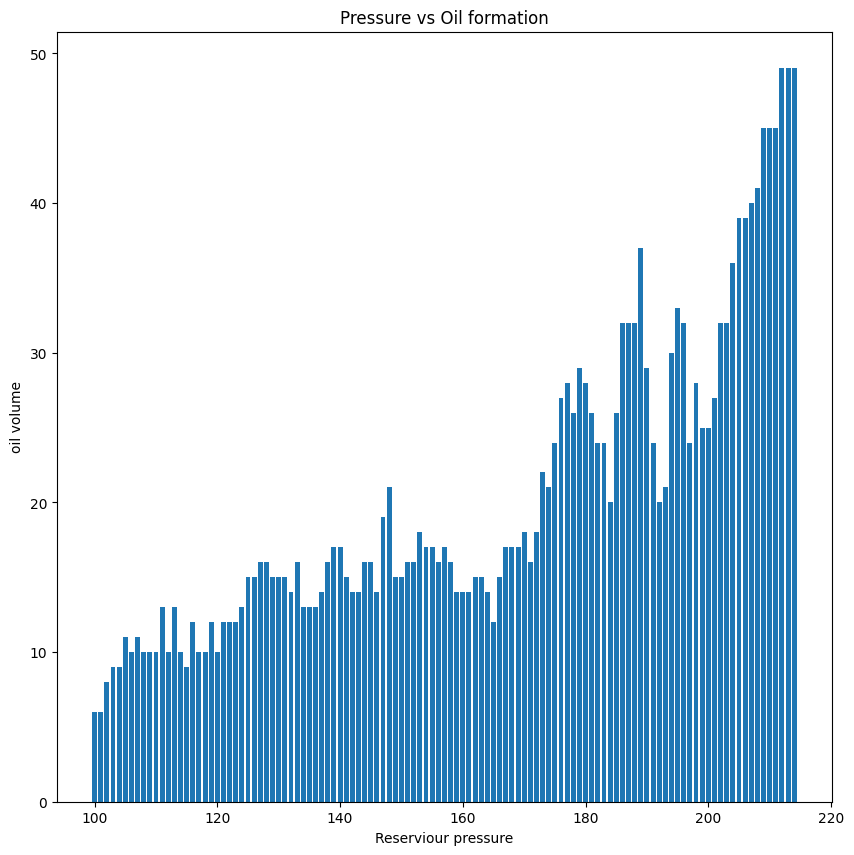

In [8]:
plt.figure(figsize=(10,10))
plt.bar(df["Reservoir Pressure (atm)"],df["Oil Volume (m3/day)"])
plt.xlabel("Reserviour pressure")
plt.ylabel("oil volume")
plt.title("Pressure vs Oil formation")
plt.show()


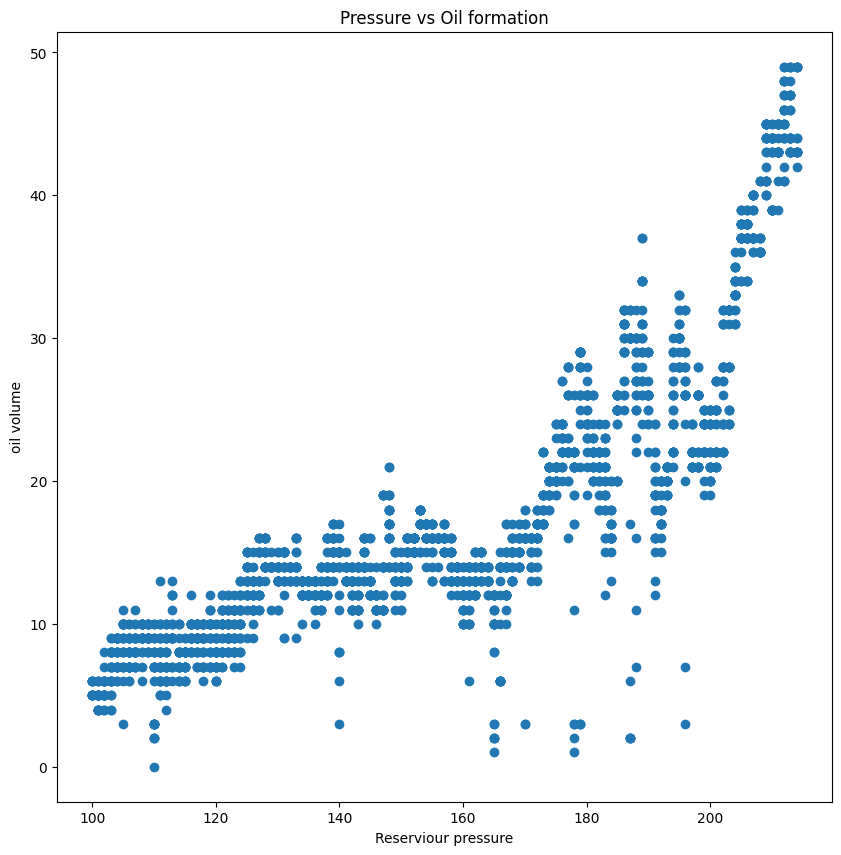

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(df["Reservoir Pressure (atm)"],df["Oil Volume (m3/day)"])
plt.xlabel("Reserviour pressure")
plt.ylabel("oil volume")
plt.title("Pressure vs Oil formation")
plt.show()


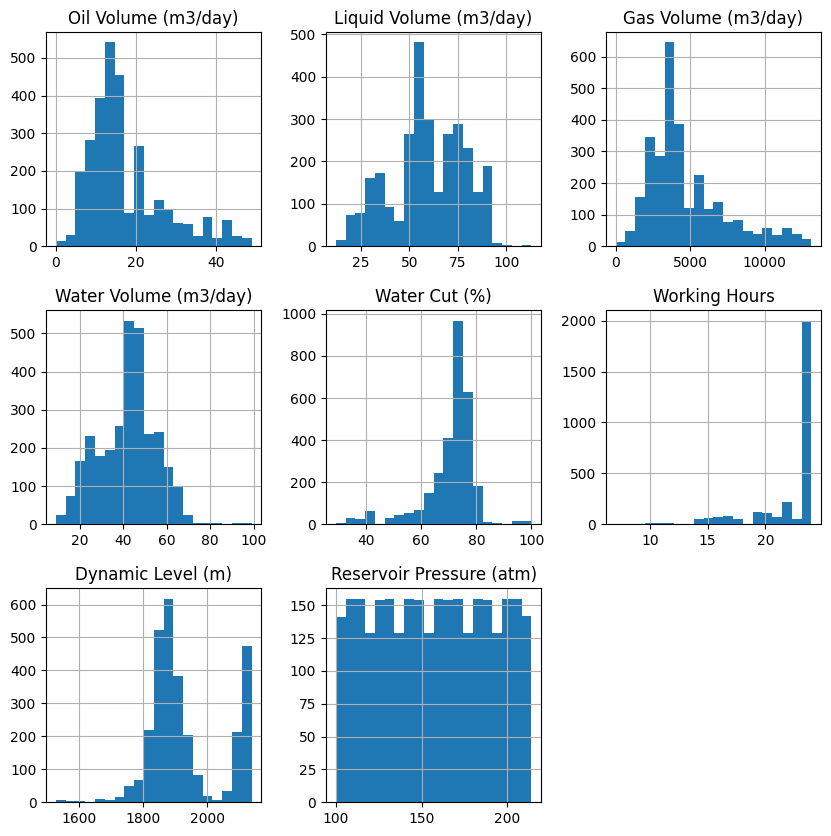

In [10]:
df.hist(bins=20,figsize=(10,10))
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
X=df.drop(["Oil Volume (m3/day)"],axis=1)
Y=df["Oil Volume (m3/day)"]

In [14]:
X.shape

(2939, 7)

In [15]:
Y.shape

(2939,)

In [16]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,random_state=42)

LINEAR REGRESSION

In [17]:
LR=LinearRegression()

In [18]:
LR.fit(Xtrain,Ytrain)

LinearRegression()

In [19]:
y_train_lr=LR.predict(Xtrain)
y_test_lr=LR.predict(Xtest)

In [25]:
print("---------------Linear Regression--------------")
print("Train mse: ",mean_squared_error(Ytrain,y_train_lr))
print("Test mse: ",mean_squared_error(Ytest,y_test_lr))
print("Train r2score: ",r2_score(Ytrain,y_train_lr))
print("Test r2score: ",r2_score(Ytest,y_test_lr))

---------------Linear Regression--------------
Train mse:  0.07741816384056054
Test mse:  0.07478730312868061
Train r2score:  0.9991823011854077
Test r2score:  0.9991812698672666


RANDOM FOREST REGRESSOR

In [26]:
RF=RandomForestRegressor(n_estimators=100,random_state=42)
RF.fit(Xtrain,Ytrain)

RandomForestRegressor(random_state=42)

In [27]:
y_train_rf=RF.predict(Xtrain)
y_test_rf=RF.predict(Xtest)

In [28]:
print("---------------Random Forest Regressor--------------")
print("Train mse: ",mean_squared_error(Ytrain,y_train_lr))
print("Test mse: ",mean_squared_error(Ytest,y_test_lr))
print("Train r2score: ",r2_score(Ytrain,y_train_rf))
print("Test r2score: ",r2_score(Ytest,y_test_rf))

---------------Random Forest Regressor--------------
Train mse:  0.07741816384056054
Test mse:  0.07478730312868061
Train r2score:  0.9999893684069574
Test r2score:  0.9999512175747008


XGBOOST REGRESSOR

In [29]:
from xgboost import XGBRegressor

In [30]:
xgb=XGBRegressor(n_estimators=100,learning_rate=0.1,random_state=42)
xgb.fit(Xtrain,Ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [31]:
y_train_xgb=xgb.predict(Xtrain)
y_test_xgb=xgb.predict(Xtest)

In [32]:
print("---------------Xgboost Regressor--------------")
print("Train mse: ",mean_squared_error(Ytrain,y_train_xgb))
print("Test mse: ",mean_squared_error(Ytest,y_test_xgb))
print("Train r2score: ",r2_score(Ytrain,y_train_xgb))
print("Test r2score: ",r2_score(Ytest,y_test_xgb))

---------------Xgboost Regressor--------------
Train mse:  0.004485434386879206
Test mse:  0.017649183049798012
Train r2score:  0.9999526143074036
Test r2score:  0.9998067617416382


In [35]:
print(Y.min())

0


In [36]:
print(Y.max())

49


In [37]:
print(Y.mean())

17.624362027900645


In [38]:
import joblib
joblib.dump(RF, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [39]:
X

,Liquid Volume (m3/day),Gas Volume (m3/day),Water Volume (m3/day),Water Cut (%),Working Hours,Dynamic Level (m),Reservoir Pressure (atm)
0,70,13055,21,29,24,1819,214
1,70,13055,21,29,24,1836,214
2,70,13055,21,29,24,1788,214
3,70,13055,21,29,24,1789,214
4,70,11768,26,36,24,1825,214
...,...,...,...,...,...,...,...
2934,20,1593,15,70,16,2101,100
2935,20,1593,15,70,16,2113,100
2936,20,1583,14,70,16,2125,100
2937,20,1573,14,70,16,2125,100


In [41]:
print(df.columns.tolist())


['Oil Volume (m3/day)', 'Liquid Volume (m3/day)', 'Gas Volume (m3/day)', 'Water Volume (m3/day)', 'Water Cut (%)', 'Working Hours', 'Dynamic Level (m)', 'Reservoir Pressure (atm)']
